In [5]:
import os, cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


In [8]:
path = "asl_alphabet_test/asl_alphabet_test"

paths = []
for x in enumerate(os.listdir(path)):
    paths.append(path + "/" + x[1])

paths = sorted(paths)

img = cv2.imread(paths[24])

type(img)


numpy.ndarray

In [9]:
img.shape

(200, 200, 3)

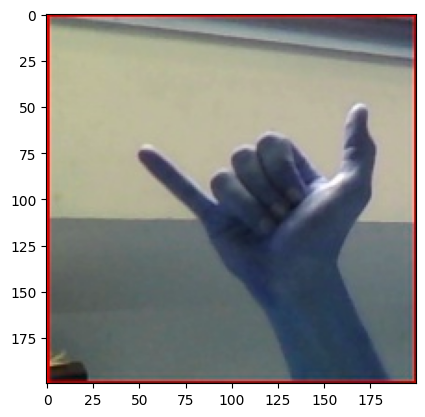

In [10]:
img_plot = plt.imshow(img)
plt.show()

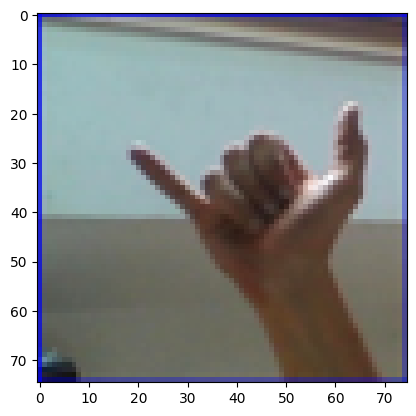

In [11]:
# Resizing the image
from PIL import Image

img = Image.open(paths[24])
img_resized = img.resize((75, 75))
img_plot = plt.imshow(img_resized)
plt.show()

(200, 200)


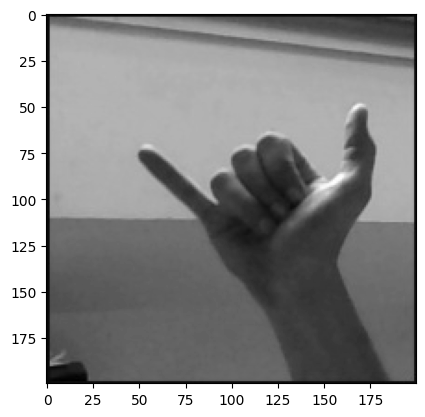

In [12]:
# Convert to grayscale 
import skimage
from skimage.io import imread

img = cv2.imread(paths[0])
img = imread(paths[24])
gray_image = skimage.color.rgb2gray(img)
plt.imshow(gray_image, cmap = 'gray')
print(gray_image.shape)

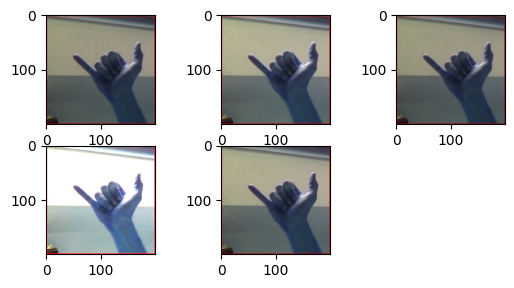

In [8]:
# Change the brightness of the image
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims

img = cv2.imread(paths[24])
datagen = ImageDataGenerator(brightness_range=[0.5,2.0])
sample = expand_dims(img, 0)

iterator = datagen.flow(sample, batch_size=1)

for j in range(5):
    plt.subplot(330 + 1 + j)
    chunk = iterator.next()
    sub_img = chunk[0].astype('uint8')
    plt.imshow(sub_img)

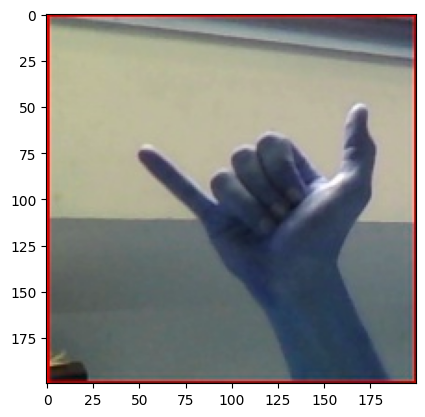

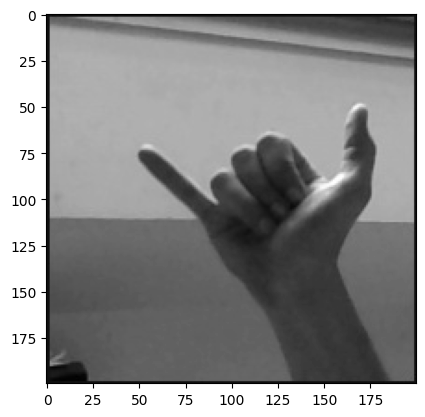

In [13]:
# img = imread(paths[24])
# img_plot = plt.imshow(img)
# plt.show()

image = cv2.imread(paths[24])
y = plt.imshow(image)
plt.show()

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x = plt.imshow(gray_image, 'gray')


# print(th3.shape)
# gray = skimage.color.rgb2gray(th3)
# y = plt.imshow(gray)
# plt.show()


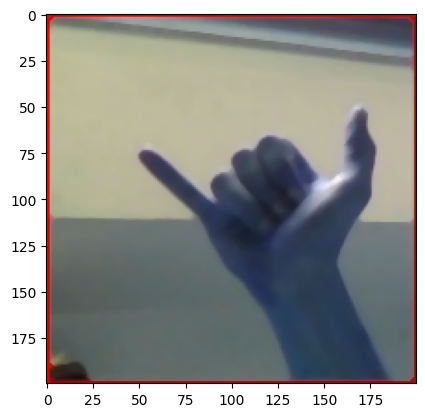

/usr/local/lib/python3.8/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


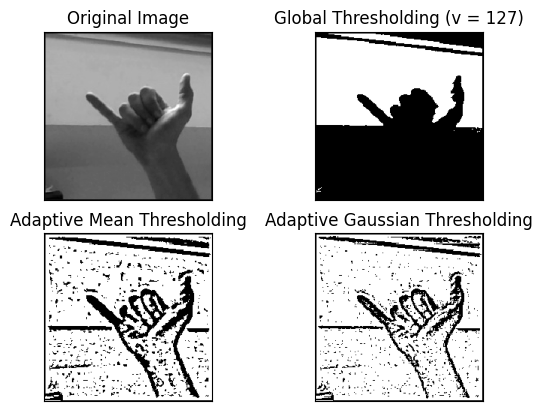

In [14]:
from tensorflow.keras.preprocessing import image
img = cv2.imread(paths[24])
img = cv2.medianBlur(img,5)
img_plot = plt.imshow(img)
plt.show()

for j in range(24,25):
    img = tf.keras.utils.load_img(paths[j], grayscale=True, target_size=(224, 224))
    img = tf.keras.utils.img_to_array(img, dtype='uint8')
    
    frame = cv2.imread(paths[24])
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(5,5),2)
    
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)

    titles = ['Original Image', 'Global Thresholding (v = 127)',
                'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
    images = [img, th1, th2, th3]
    for i in range(4):
        plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])
    plt.show()

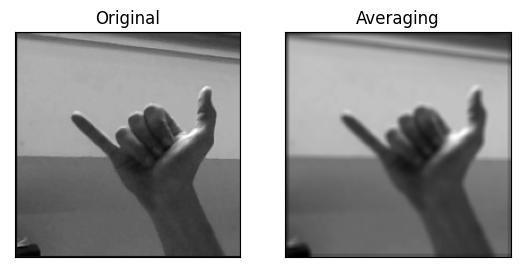

In [11]:
import numpy as np

from matplotlib import pyplot as plt

# img = cv2.imread(paths[24])
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(gray_image,-1,kernel)
plt.subplot(121),plt.imshow(gray_image, 'gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst, 'gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()


(200, 200, 1)


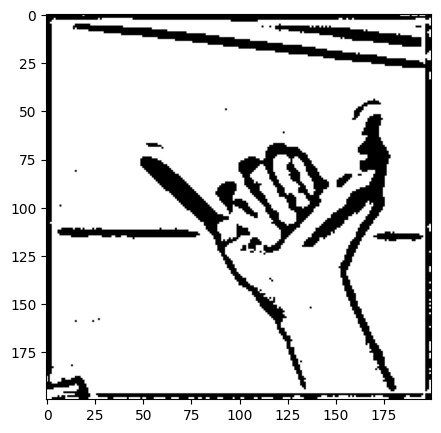

In [12]:
from keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

img = tf.keras.utils.load_img(paths[24], grayscale=True, target_size=(224, 224))
img = tf.keras.utils.img_to_array(dst, dtype='uint8')

print(img.shape)
## output : (224,224,3)
#plt.imshow(img_grey)

th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
plt.figure(figsize=(5,5))
plt.imshow(th3, cmap="gray")
plt.show()

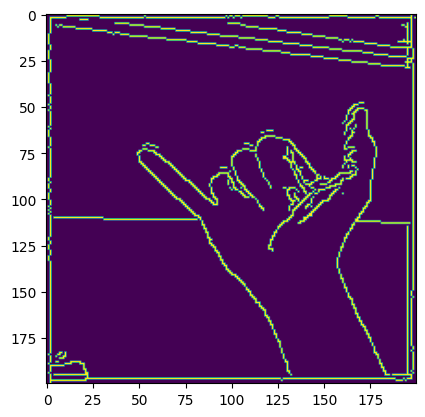

In [16]:
import cv2
  
img = cv2.imread(paths[24])  # Read image
  
# Setting parameter values
t_lower = 50  # Lower Threshold
t_upper = 150  # Upper threshold
  
# Applying the Canny Edge filter
edge = cv2.Canny(img, t_lower, t_upper)

img_plot = plt.imshow(edge)
plt.show()
# cv2.imshow('original', img)
# cv2.imshow('edge', edge)
# cv2.waitKey(0)
# cv2.destroyAllWindows()